In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import promonet

/home/mrm5248/micromamba/envs/promonet/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
stems = promonet.load.partition('vctk')['valid']

In [96]:
stem = stems[47]
promonet.load.text(promonet.CACHE_DIR / 'vctk' / f'{stem}.txt')

"Aristotle thought that the rainbow was caused by reflection of the sun's rays by the rain.\n"

In [64]:
audio = promonet.load.audio('sitting.wav')[:10 * promonet.SAMPLE_RATE]

In [66]:
audio.shape

torch.Size([1, 1631701])

In [68]:
promonet.plot.from_audio(
    audio,
    features=['pitch', 'periodicity', 'loudness', 'ppg'])

RuntimeError: Number of dimensions of repeat dims can not be smaller than number of dimensions of tensor

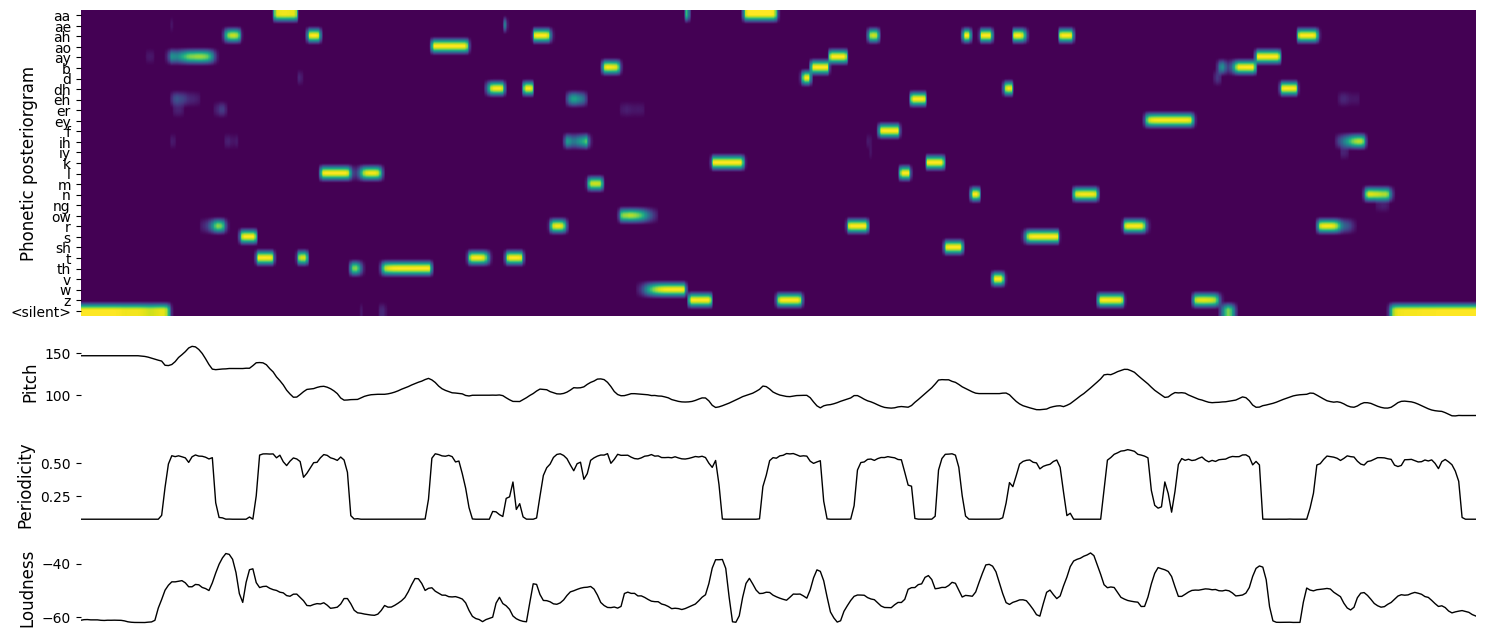

In [108]:
prefix = promonet.CACHE_DIR / 'vctk' / f'{stems[47]}-100'
promonet.plot.from_features(
    promonet.load.audio(f'{prefix}.wav'),
    *[f[..., 60:-150] for f in promonet.load.features(prefix)],
    features=['ppg', 'pitch', 'periodicity', 'loudness']).savefig('representation.pdf', bbox_inches='tight', pad_inches=0)